In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
%matplotlib inline

In [13]:
import sklearn 
from sklearn.linear_model import LogisticRegression

In [14]:
from sklearn.datasets import load_iris

In [15]:
iris=load_iris()

In [16]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [17]:
iris_data=DataFrame(iris.data,columns=['sepal length','sepal width','petal length','petal width'])

In [18]:
iris_data.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
iris_target=DataFrame(iris.target,columns=['Species'])

In [20]:
iris_target.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [23]:
def flower_species(x):
    if x==0:
        return 'setosa'
    elif x==1:
        return 'Versicolour'
    else:
        return 'Virginica'

In [24]:
iris_target=iris_target['Species'].apply(flower_species)

In [25]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [26]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [27]:
iris_df=pd.concat([iris_data,iris_target],axis=1)

In [28]:
iris_df.head()

,sepal length,sepal width,petal length,petal width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [31]:
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

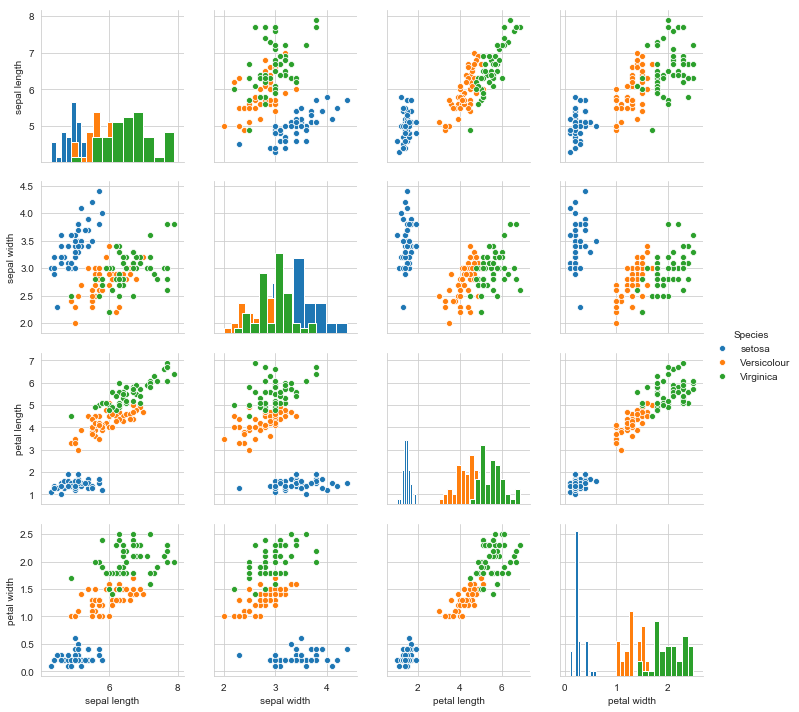

In [32]:
sns.pairplot(iris_df,hue='Species',diag_kind='hist')

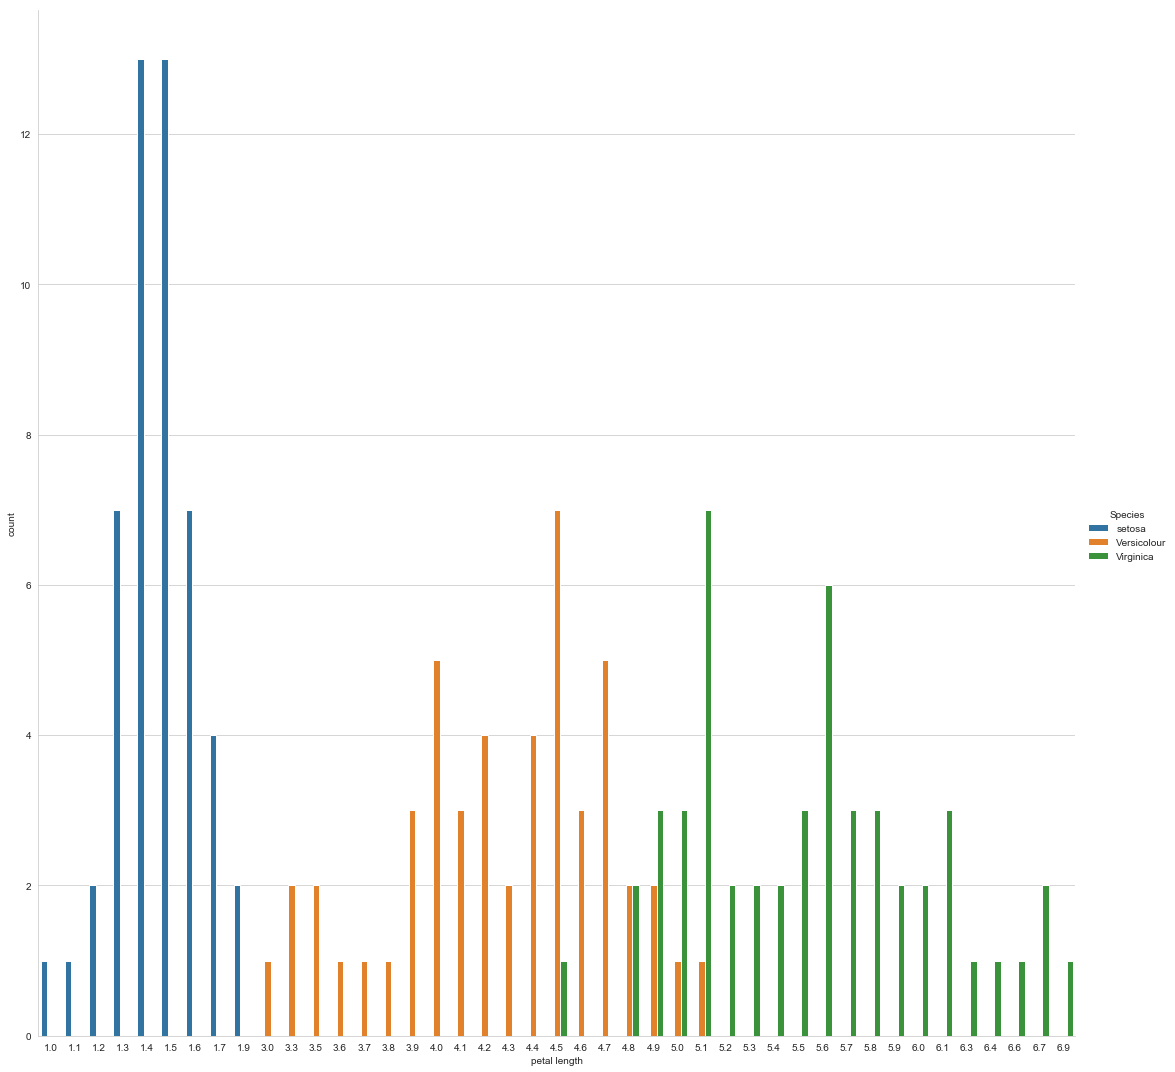

In [34]:
sns.catplot('petal length',data=iris_df,hue='Species',kind='count',height=15)

In [36]:
X=iris.data

In [37]:
X.shape

(150, 4)

In [38]:
Y=iris.target

In [39]:
Y.shape

(150,)

In [40]:
log=LogisticRegression(solver='newton-cg',multi_class='auto')

In [41]:
log.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4)

In [49]:
y_predict=log.predict(X_test)

In [50]:
y_predict

array([0, 1, 1, 1, 2, 1, 2, 2, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2,
       1, 2, 0, 2, 1, 0, 2, 1, 0, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2,
       0, 1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 1, 0, 0, 2])

In [51]:
from sklearn import metrics

In [52]:
metrics.accuracy_score(Y_test,y_predict)

0.9666666666666667

In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
confusion_matrix(Y_test,y_predict)

array([[15,  0,  0],
       [ 0, 20,  1],
       [ 0,  1, 23]], dtype=int64)

# KNN Method

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn=KNeighborsClassifier(n_neighbors=6)

In [57]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [60]:
y=knn.predict(X_test)

In [61]:
metrics.accuracy_score(y,Y_test)

0.9

In [79]:
knn1=KNeighborsClassifier(n_neighbors=3)

In [80]:
knn1.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [81]:
y=knn1.predict(X_test)

In [82]:
metrics.accuracy_score(y,Y_test)

0.9333333333333333

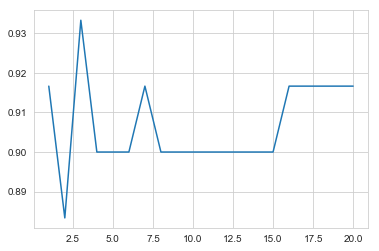

In [88]:
acc=[]
k_range=range(1,21)
for k in k_range:
    knn=KNeighborsClassifier(k)
    knn.fit(X_train,Y_train)
    y=knn.predict(X_test)
    acc.append(metrics.accuracy_score(y,Y_test))
plt.plot(k_range,acc)